<a href="https://colab.research.google.com/github/Pranav-Tech46/Machine-Learning-Practice/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


####Encoded data set with utf-8 by saving it as utf_8 encoding

In [2]:
df = pd.read_csv('/content/tough_dataset - Copy2.csv')
df.head()


,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer’s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetai

In [5]:
df.isnull().sum()


id                       0
Target A                 0
Target B                 0
LOAN_AMT                 0
Business Title           0
                      ... 
earliest_cr_line         0
last_pymnt_d             0
last_pymnt_amnt          0
next_pymnt_d          2610
last_credit_pull_d       0
Length: 69, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target A                   2946 non-null   float64
 2   Target B                   2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   int64  
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   Minimum Qual Requirements  2926 non-null   object 
 9   Preferred Skills           2553 non-null   object 
 10  Additional Information     1854 non-null   object 
 11  To Apply                   2945 non-null   object 
 12  Hours/Shift                884 non-null    object 
 13  Residency Requirement      2942 non-null   objec

##Function to get percentage of missing values

In [7]:

def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_columns = mis_val_table_columns[
        mis_val_table_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Dataset has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_columns.shape[0]))
    return mis_val_table_columns

In [8]:

missing_values_table(df)

Dataset has 69 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
TimeAfterBootcamp,2725,92.50
next_pymnt_d,2610,88.59
HackathonReasons,2097,71.18
Hours/Shift,2062,69.99
FrameworkWorkedWith,1313,44.57
FrameworkDesireNextYear,1215,41.24
SelfTaughtTypes,1134,38.49
DatabaseDesireNextYear,1115,37.85
Additional Information,1092,37.07
PlatformDesireNextYear,1037,35.20


###Dropping unnecessary columns

In [9]:
#Dropping the columns with missing values% >60 & unnecessary columns
X1 = df.drop(['Hours/Shift','HackathonReasons','TimeAfterBootcamp','next_pymnt_d','id','Target A','Target B','Posting Date','Posting Updated','Process Date'],axis = 1)
X1.head(3)


,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,19-Mar
1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer’s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,19-Mar
2,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s 

In [10]:
X1.columns

Index(['LOAN_AMT', 'Business Title', 'Civil Service Title',
       'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements',
       'Preferred Skills', 'Additional Information', 'To Apply',
       'Residency Requirement', 'FormalEducation', 'UndergradMajor',
       'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_status',
       'pymnt_plan', 'url', 

In [11]:
#Imputing the missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(X1)
X2 = imp.transform(X1)


In [12]:
x3= pd.DataFrame(X2)
x3.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...","Click the ""Apply Now"" button.",New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,19-Mar
1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,ERROR: #NAME?,Appointments are subject to OMB approval. For ...,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer’s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,Agile;Scrum,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,19-Mar
2,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,"Office / productivity suite (Microsoft Office,...",One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Ag

In [13]:
x3.columns = ['LOAN_AMT', 'Business Title', 'Civil Service Title',
       'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements',
       'Preferred Skills', 'Additional Information', 'To Apply',
       'Residency Requirement', 'FormalEducation', 'UndergradMajor',
       'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d']

In [14]:
x3.isnull().sum()

LOAN_AMT                     0
Business Title               0
Civil Service Title          0
Division/Work Unit           0
Job Description              0
Minimum Qual Requirements    0
Preferred Skills             0
Additional Information       0
To Apply                     0
Residency Requirement        0
FormalEducation              0
UndergradMajor               0
CompanySize                  0
DevType                      0
YearsCoding                  0
YearsCodingProf              0
HopeFiveYears                0
JobSearchStatus              0
LastNewJob                   0
UpdateCV                     0
CommunicationTools           0
TimeFullyProductive          0
EducationTypes               0
SelfTaughtTypes              0
AgreeDisagree1               0
AgreeDisagree2               0
AgreeDisagree3               0
LanguageWorkedWith           0
LanguageDesireNextYear       0
DatabaseWorkedWith           0
DatabaseDesireNextYear       0
PlatformWorkedWith           0
Platform

In [15]:
x3.head(5)

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...","Click the ""Apply Now"" button.",New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,19-Mar
1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,ERROR: #NAME?,Appointments are subject to OMB approval. For ...,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer’s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,Agile;Scrum,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,19-Mar
2,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satis

In [16]:
print('No. of missing values in Target A is {0}'.format(df['Target A'].isnull().sum()))
print('No. of missing values in Target B is {0}'.format(df['Target B'].isnull().sum()))

No. of missing values in Target A is 0
No. of missing values in Target B is 0


In [37]:
import seaborn as sns


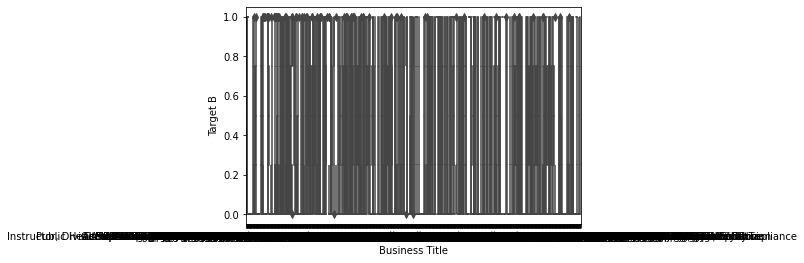

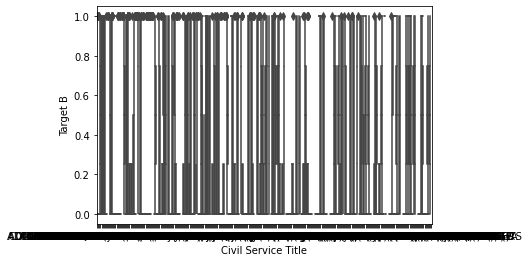

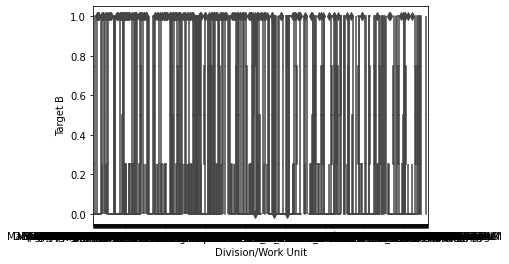

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], 

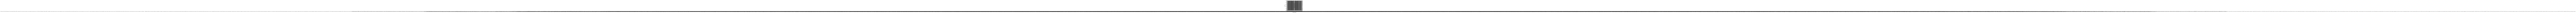

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


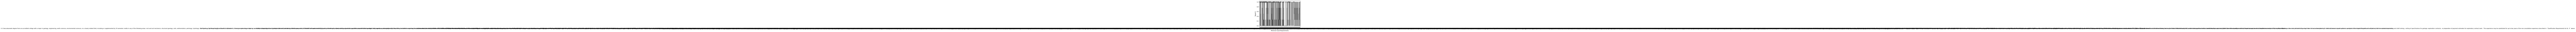

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags

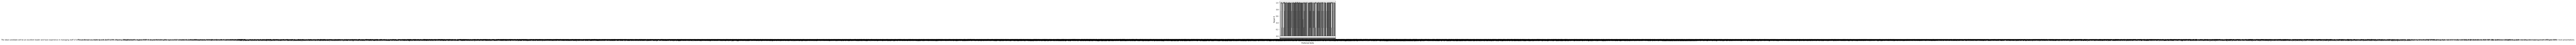

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


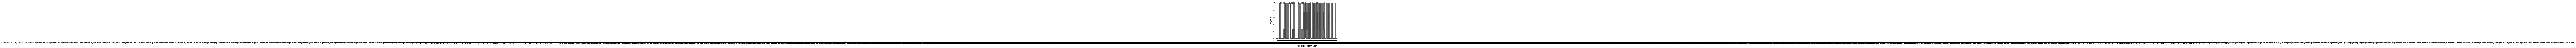

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


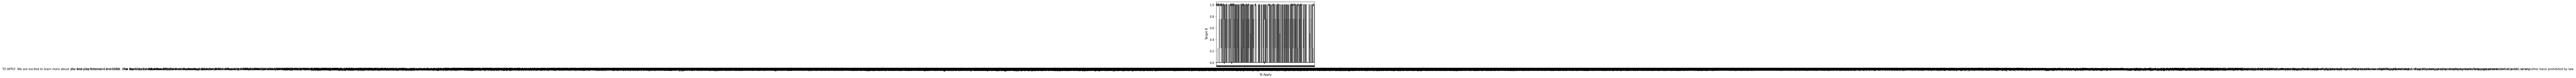

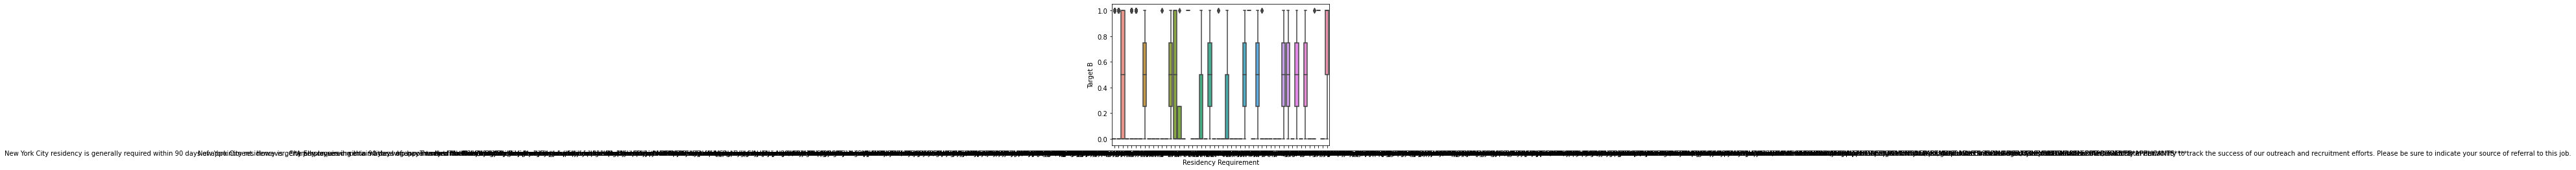

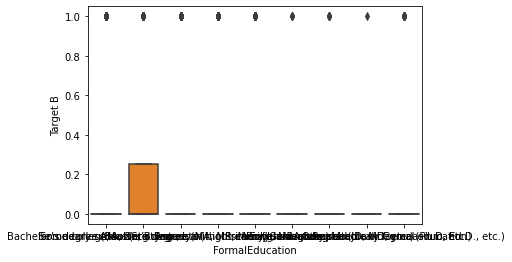

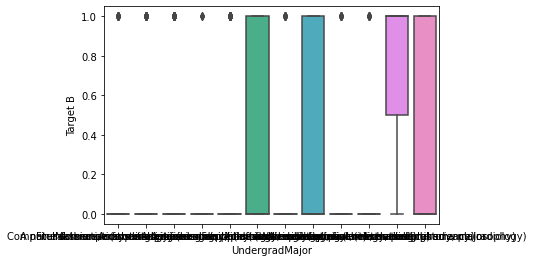

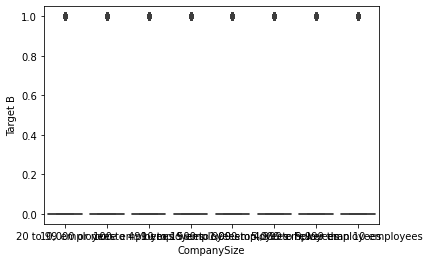

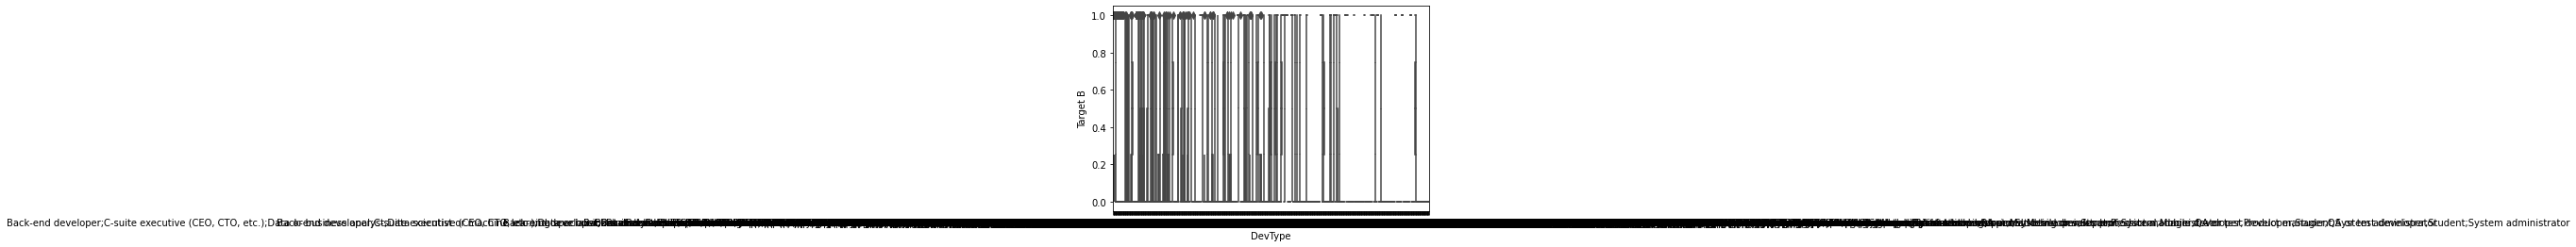

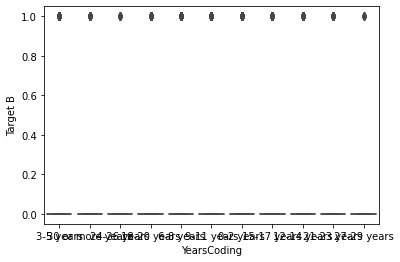

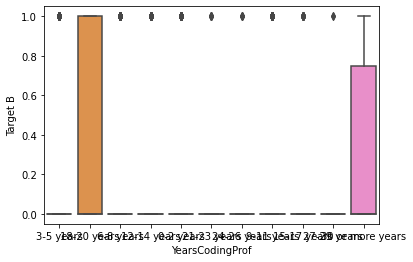

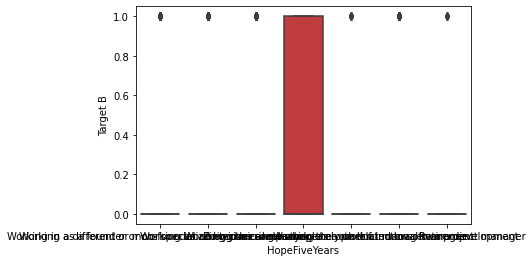

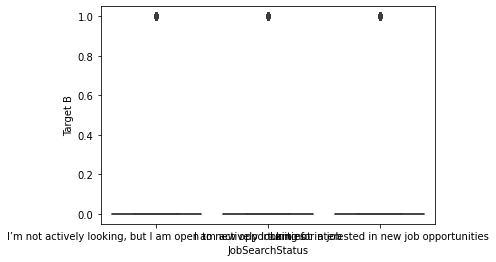

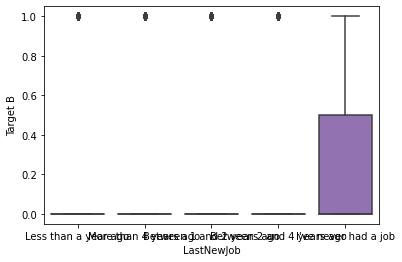

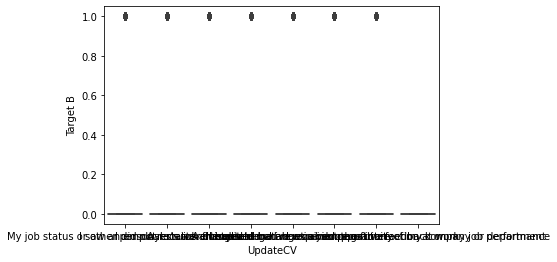

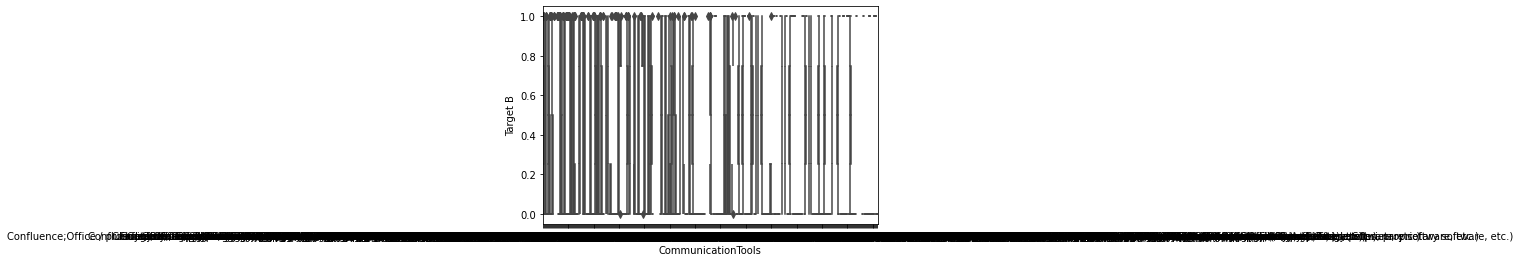

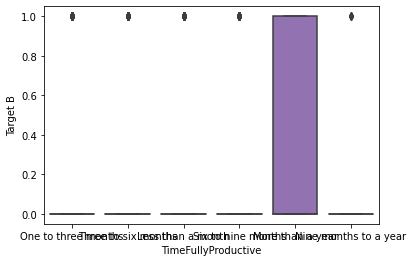

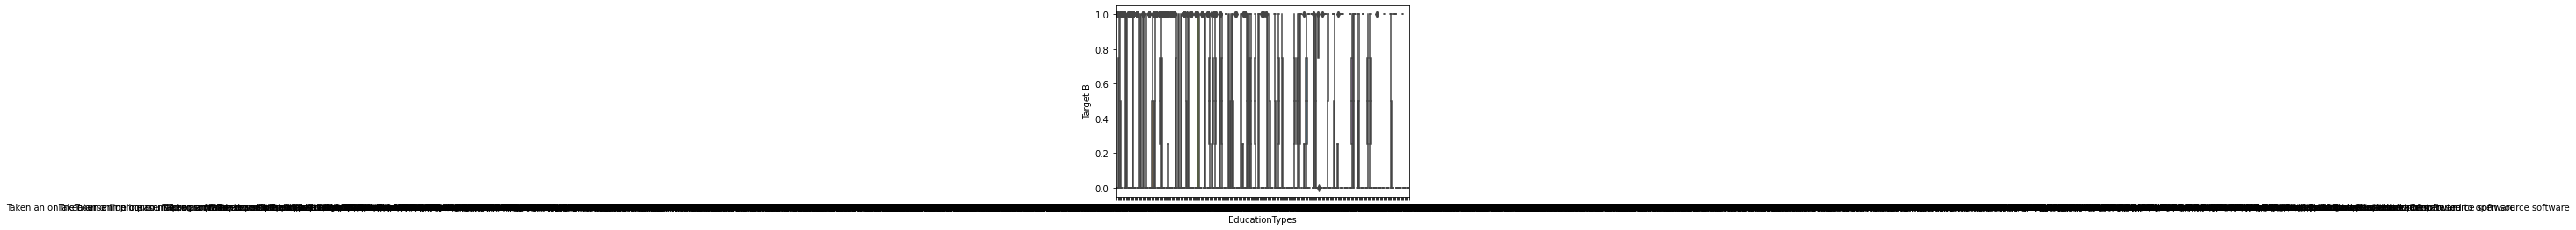

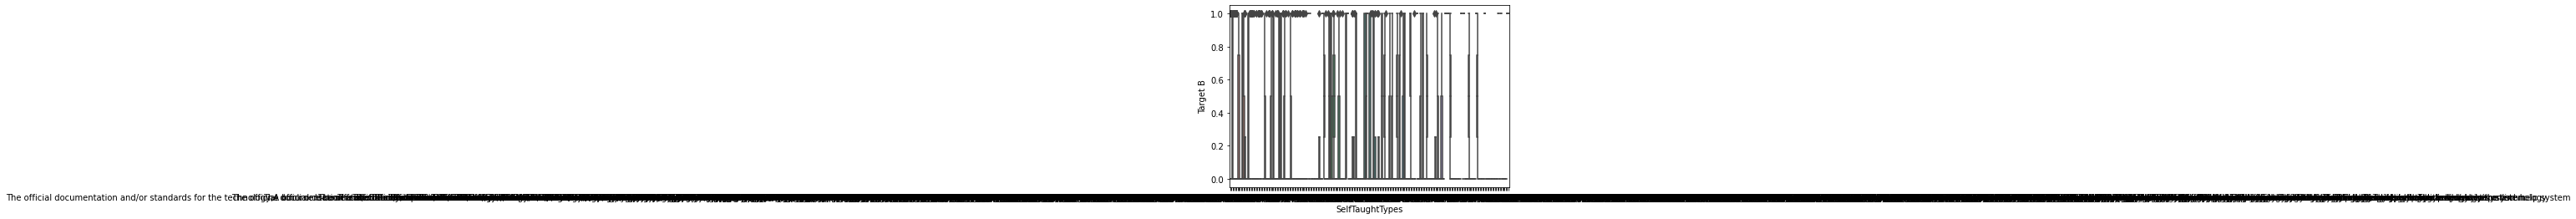

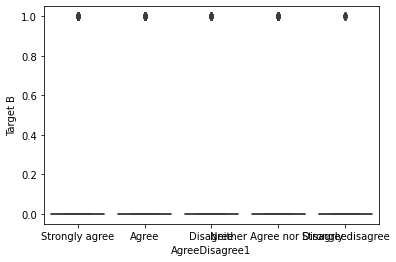

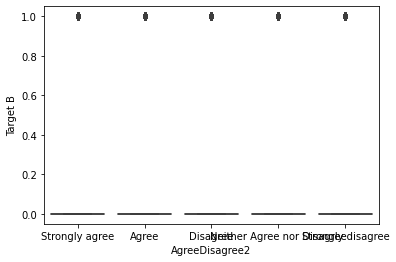

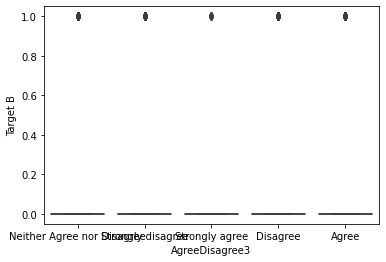

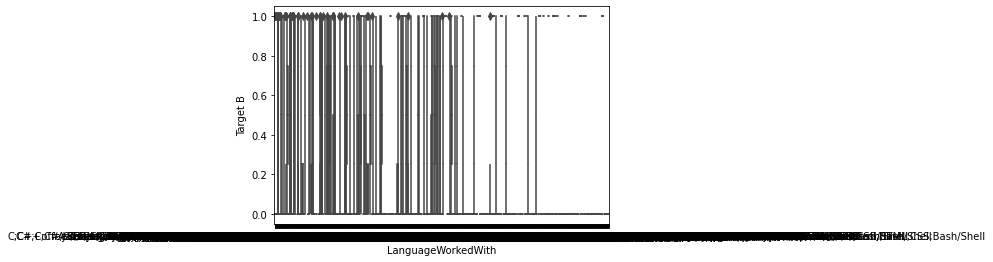

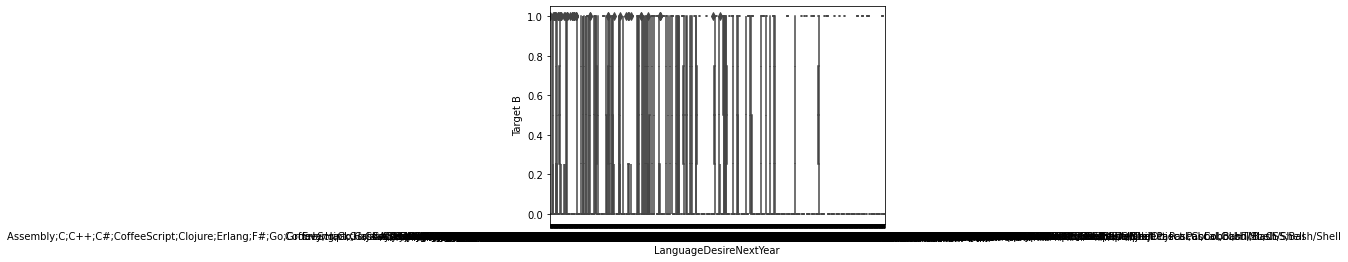

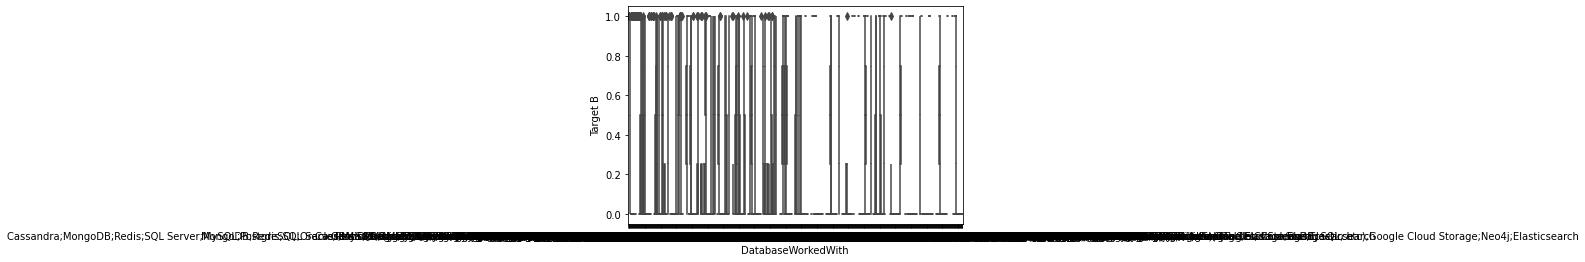

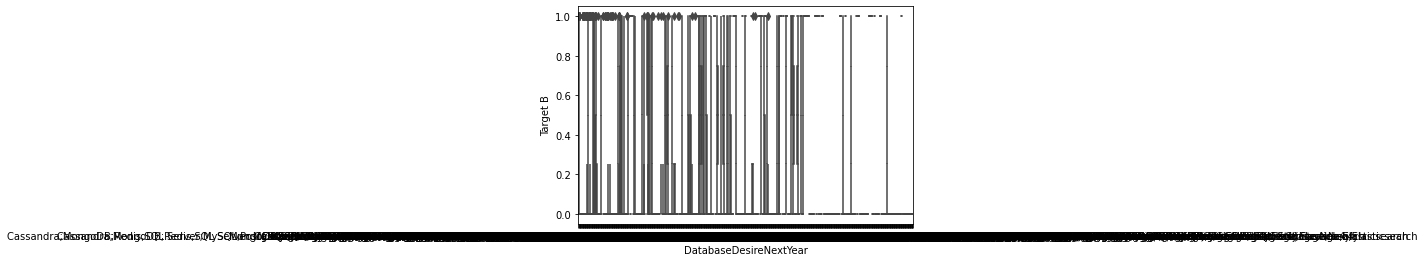

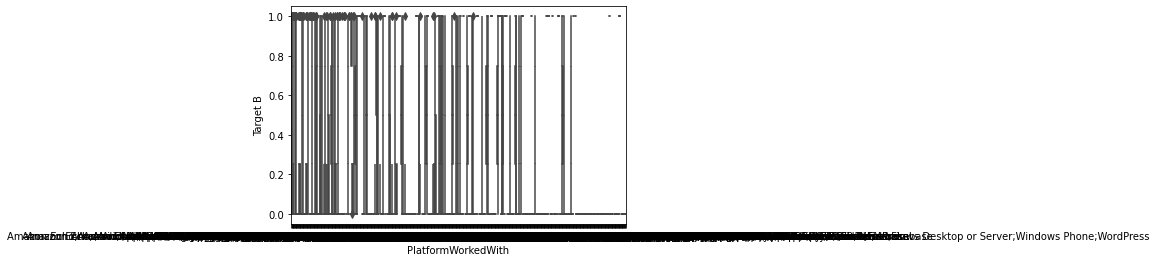

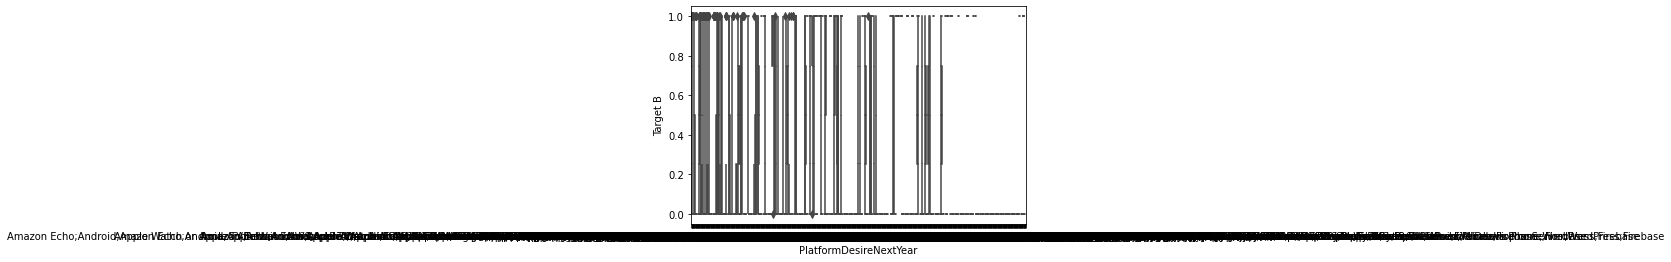

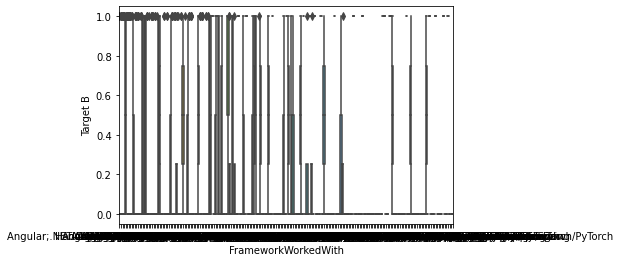

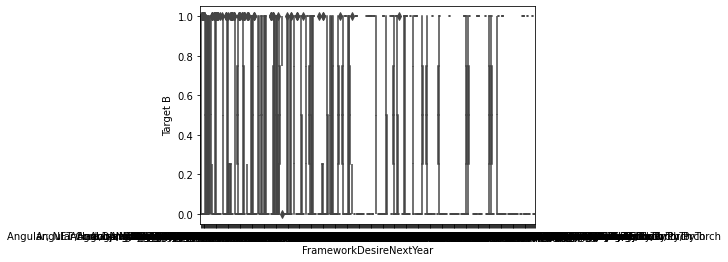

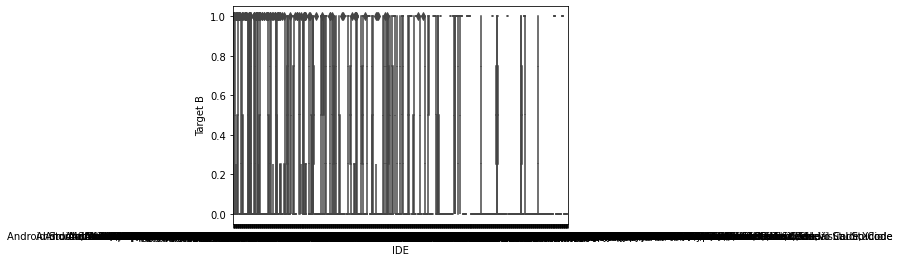

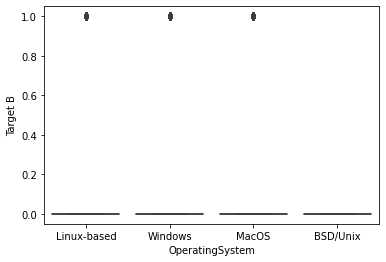

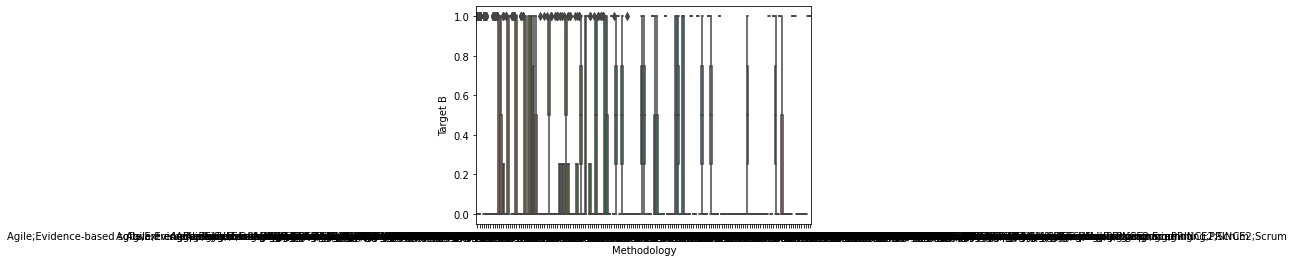

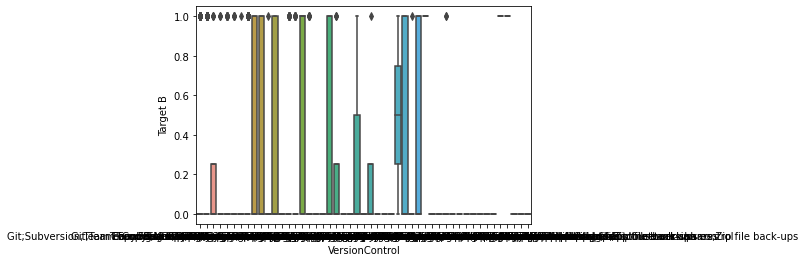

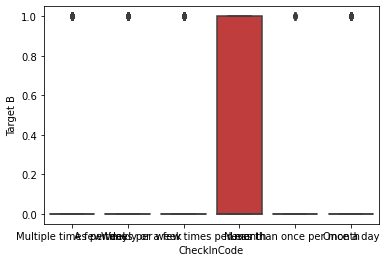

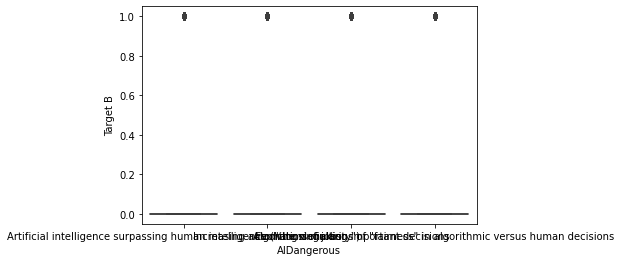

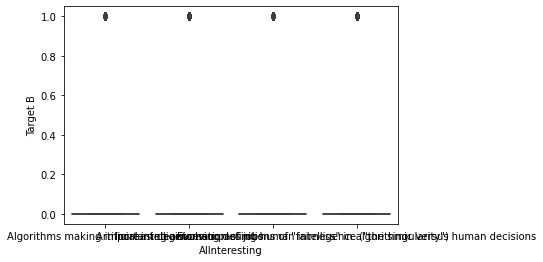

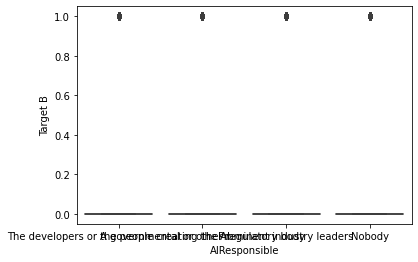

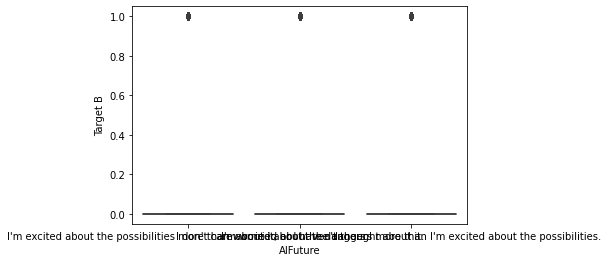

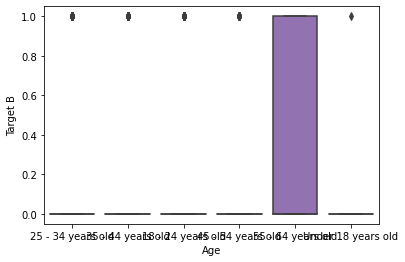

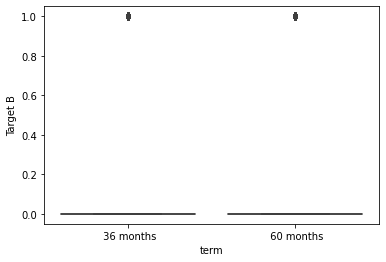

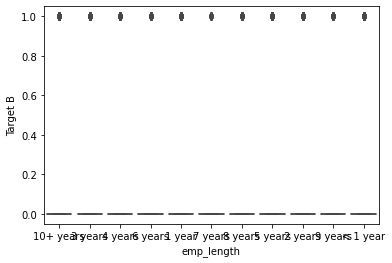

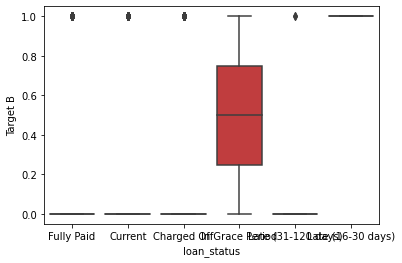

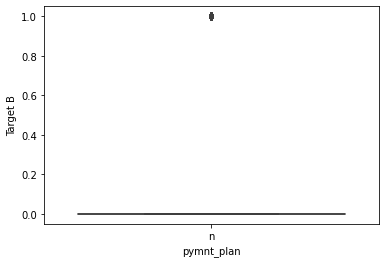

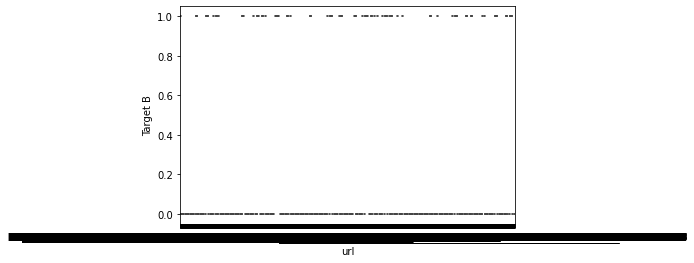

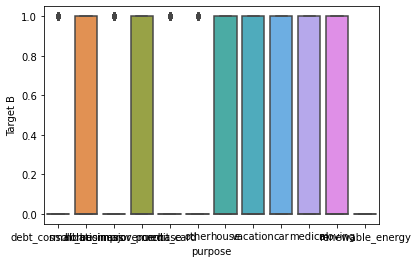

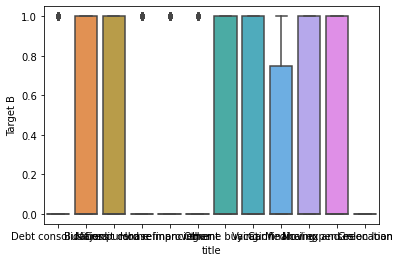

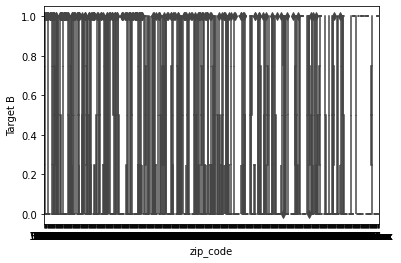

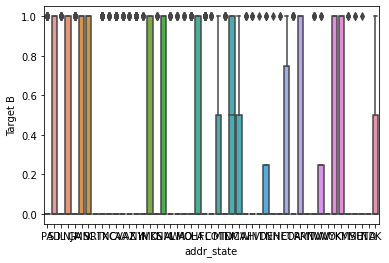

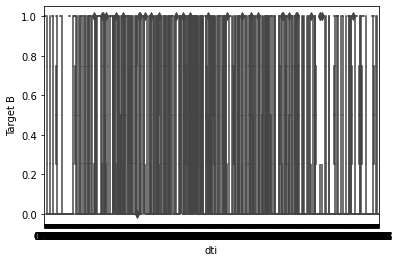

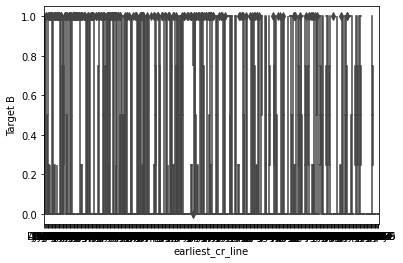

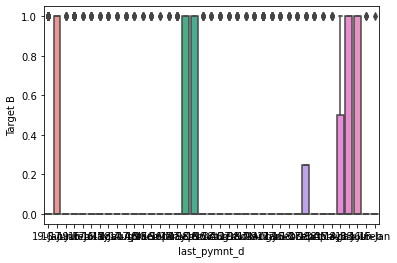

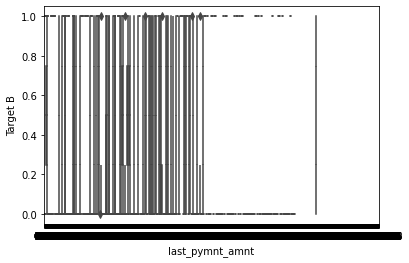

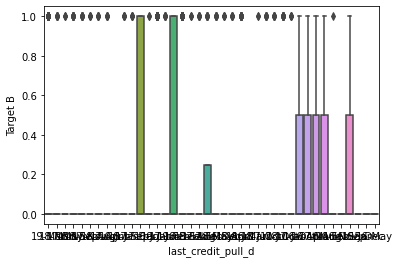

In [38]:
for i in x3.iloc[:,1:].columns:
  sns.boxplot(y=df['Target B'],x=df[i])
  plt.show()





##Getting dummy values for categorocal variables

In [17]:
x4 = pd.get_dummies(x3,columns=['Business Title', 'Civil Service Title',
       'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements',
       'Preferred Skills', 'Additional Information', 'To Apply',
       'Residency Requirement', 'FormalEducation', 'UndergradMajor',
       'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'])


In [18]:
print('Shape before encoding is {0} & after encoding is {1}'.format(x3.shape,x4.shape))

Shape before encoding is (2946, 59) & after encoding is (2946, 25627)


In [19]:
X = x4.values
y = df['Target B'].values
y1 = df['Target A'].values

# Training Model for Target B

####Splitting the data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


####Scaling the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Trainig data with different classification algorithms

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [23]:
models = []
models.append(('Logistic Regression',LogisticRegression(random_state=0)))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=10,random_state=0)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 30)))

##Getting accuracy score and confusion matrix for different algorithms

In [24]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    #Checking the cross_val_score
    score=cross_val_score(model,X,y,cv=10)
    print('Cross Val score is {0}'.format(score.mean()))
    
    
    # Make predictions.
    predictions = model.predict(X_test)
    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    print('\n')
    from sklearn.metrics import accuracy_score
    print('Accuracy Score: {0}'.format(accuracy_score(predictions,y_test)))
    print('\n')

Logistic Regression
Cross Val score is 0.7878508013374841
[[434 123]
 [ 21  12]]


Accuracy Score: 0.7559322033898305


Naive Bayes
Cross Val score is 0.5780998501095354
[[379 113]
 [ 76  22]]


Accuracy Score: 0.6796610169491526


RandomForest
Cross Val score is 0.7885276144356047
[[454 134]
 [  1   1]]


Accuracy Score: 0.7711864406779662


Decision Tree
Cross Val score is 0.7189380837080596
[[402 117]
 [ 53  18]]


Accuracy Score: 0.711864406779661


KNN
Cross Val score is 0.7898846996425689
[[455 135]
 [  0   0]]


Accuracy Score: 0.7711864406779662




##Getting f1_score for all models

In [36]:
from sklearn.metrics import f1_score
for name,classifier in models:
  y_pred = classifier.predict(X_test)
  f1_sc = f1_score(y_test,y_pred,average='weighted')
  print(name,'-',f1_sc)
  

Logistic Regression - 0.6941400530199351
Naive Bayes - 0.6604843187827331
RandomForest - 0.6747087889322774
Decision Tree - 0.6765719468058614
KNN - 0.6715594842267456


###*So the Best F1_score is- 0.6941400530199351*

#For Target A

#####Converting Target A into integer type

In [27]:
y2 = df.astype({'Target A':int})
y2.head()
y3 = y2.iloc[:,1]
y3.shape
y3.dtype



dtype('int64')

In [28]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y3,test_size=0.20,random_state=0)


In [29]:
y_train1.shape

(2356,)

In [30]:
from sklearn.tree import DecisionTreeRegressor
classifier1 = DecisionTreeRegressor(random_state=0)
classifier1.fit(X_train, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,mean_squared_error     

In [32]:
y2_pred = classifier1.predict(X_test)

print("The mean squared error is {0}".format(mean_squared_error(y_test1,y2_pred,squared=False)))



The mean squared error is 22504.597705388023


In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
y3_pred = regressor.predict(X_test)

In [35]:
print("The mean squared error is {0}".format(mean_squared_error(y_test1,y3_pred,squared=False)))

The mean squared error is 27153.40331799677
